## Basic Neural Network Starter Notebook

MNIST is a dataset that is comprised of 60,000 handwritten  numbers and is a standard benchmark for  classification tasks.


In [8]:
# Install libraries if needed
!pip install tabulate --user

### Import Dependencies

In [9]:
# General Packages
import math
import os
from pathlib import Path

# data handling libraries
import pandas as pd
import numpy as np
from tabulate import tabulate

# visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

# extra libraries
import warnings
warnings.filterwarnings('ignore')

# Packages to support NN

# sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#tensorflow
import tensorflow as tf
from tensorflow import keras

# Keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

### Load the data

In [10]:
# Load data from a folder called data within my project file
#  .. my_project
#     |
#     |___code
#     |   |
#     |   |__ CS3500_Starter_Notebook.ipynb
#     |
#     |___data
#         |
#         |__ credit_score.csv
#
#---------------------------------------------------------------

# Get the current working directory
current_dir = os.getcwd() 

# Construct a path to the parent directory
#parent_dir = os.path.dirname(current_dir)

# Access a file in the parent directory
file_path = os.path.join(current_dir, "credit_score_data.csv")

# Load Credit Score data
df = pd.read_csv(file_path) 

## Data Visualizations and Cleaning
### Look at the data

In [11]:
# Visualizing the first 5 rows of data
df.head()

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
# Check the list of columns
df.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN',
       'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### Look at Metadata

In [13]:
# getting dataframe number of rows and number of columns
df.shape

(80000, 29)

In [14]:
# Look at data on the first row
df.iloc[0]

Unnamed: 0                                                                  0
ID                                                                     0x1602
Customer_ID                                                         CUS_0xd40
Month                                                                 January
Name                                                            Aaron Maashoh
Age                                                                        23
SSN                                                               821-00-0265
Occupation                                                          Scientist
Annual_Income                                                        19114.12
Monthly_Inhand_Salary                                             1824.843333
Num_Bank_Accounts                                                           3
Num_Credit_Card                                                             4
Interest_Rate                                                   

In [15]:
# getting counts per columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80000 non-null  int64  
 1   ID                        80000 non-null  object 
 2   Customer_ID               80000 non-null  object 
 3   Month                     80000 non-null  object 
 4   Name                      71988 non-null  object 
 5   Age                       80000 non-null  object 
 6   SSN                       80000 non-null  object 
 7   Occupation                80000 non-null  object 
 8   Annual_Income             80000 non-null  object 
 9   Monthly_Inhand_Salary     68024 non-null  float64
 10  Num_Bank_Accounts         80000 non-null  int64  
 11  Num_Credit_Card           80000 non-null  int64  
 12  Interest_Rate             80000 non-null  int64  
 13  Num_of_Loan               80000 non-null  object 
 14  Type_o

## Define Some Costume Functions to Examine Variables

In [16]:
def plot_numerical_column(data_frame, Column_Name, n_bins):
# Plot histogram and box plot for numerical columns
# num_col: Numerical Column i.e. df['Age']
# n_bins : number of bins

   # Get data set
   data = data_frame[Column_Name]
    
   # Plotting histogram
   ####################
   # Plotting a basic histogram
   plt.hist(data, bins=n_bins, color='skyblue', edgecolor='black')
    
   # Adding labels and title
   plt.xlabel(Column_Name)
   plt.ylabel('Frequency')
   plt.title('Basic Histogram')

   plt.show()
 
   # Plotting box plot
   ####################
   plt.boxplot(data)
   plt.ylabel(Column_Name)
   plt.ylim(data.min(), data.max()) 
   plt.title('Basic Boxplot')
   plt.show()

   # Display the plot
   plt.show()


def plot_no_numerical_column(data_frame, Column_Name):
# Plot counts for no numerical cases

   # Get data set
   data = data_frame[Column_Name]

   occupation_count = data.value_counts()
   sns.barplot(x = occupation_count.values, y = occupation_count.index, orient = 'h')
   plt.xlabel('Count')
   plt.ylabel(Column_Name)

   # Display the plot
   plt.show()

In [17]:

# Function to evaluate predicted vs test data categorical variables
def plot_prediction_vs_test_categorical(y_test, y_pred, class_labels):
    # Plots the prediction vs test data for categorical variables.

    # Args:
    #     y_test (array-like): True labels of the test data.
    #     y_pred (array-like): Predicted labels of the test data.
    #     class_labels (list): List of class labels.

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Calculates performance of multivariate classification model
def calculate_performance_multiclass(y_true, y_pred):
    # Calculates various performance metrics for multiclass classification.

    # Args:
    #     y_true: The true labels.
    #     y_pred: The predicted labels.

    # Returns:
    #     A dictionary containing the calculated metrics.

    metrics = {}

    # Accuracy
    metrics['accuracy'] = accuracy_score(y_true, y_pred)

    # Precision, Recall, and F1-score (macro-averaged)
    metrics['precision'] = precision_score(y_true, y_pred, average='macro')
    metrics['recall'] = recall_score(y_true, y_pred, average='macro')
    metrics['f1_score'] = f1_score(y_true, y_pred, average='macro')

    # Confusion Matrix
    metrics['confusion_matrix'] = confusion_matrix(y_true, y_pred)

    return metrics

## Performing Basic Data Cleaning

### Check for missing variables

In [18]:
# This will count the number of missing values per column, we will handle tis at each column
df.isna().sum()

Unnamed: 0                      0
ID                              0
Customer_ID                     0
Month                           0
Name                         8012
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11976
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9016
Delay_from_due_date             0
Num_of_Delayed_Payment       5544
Changed_Credit_Limit            0
Num_Credit_Inquiries         1552
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7245
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3586
Payment_Behaviour               0
Monthly_Balance               962
Credit_Score                    0
dtype: int64

### Dropping some columns
From CS3500_Credit_score_classification_data_cleaning.ipynb we determined that some columns are not necessary. Also, for this model we will only consider an small amount of variables

In [19]:
# Dropping not related columns
##############################
columns_to_drop_unrelated = ['Unnamed: 0', 'Month', 'Name', 'SSN',]

# Drop columns
df.drop(columns=columns_to_drop_unrelated, inplace=True)


# Dropping columns not in used in this model
##############################
columns_to_drop_not_used= ['Num_Bank_Accounts', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment'
                           , 'Changed_Credit_Limit', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Num_Credit_Inquiries'
                           , 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_History_Age'
                           ,'Monthly_Balance', 'Payment_Behaviour']

# Drop columns
df.drop(columns=columns_to_drop_not_used, inplace=True)

# checking Columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Age                       80000 non-null  object 
 3   Occupation                80000 non-null  object 
 4   Annual_Income             80000 non-null  object 
 5   Monthly_Inhand_Salary     68024 non-null  float64
 6   Num_Credit_Card           80000 non-null  int64  
 7   Interest_Rate             80000 non-null  int64  
 8   Credit_Mix                80000 non-null  object 
 9   Credit_Utilization_Ratio  80000 non-null  float64
 10  Credit_Score              80000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.7+ MB


### Analyze each column and model

We will perform the following tasks for each columns in the model:

1. Cast the column to the correct data type
2. handle missing values
3. Plot numerical columns to make sure distributions are correct

#### Age

In [20]:
# Extracting non-numeric textual data
df['Age'][~df['Age'].str.isnumeric()].unique() 

array(['-500', '28_', '34_', '30_', '24_', '33_', '35_', '31_', '40_',
       '37_', '54_', '21_', '20_', '43_', '38_', '18_', '2111_', '46_',
       '16_', '19_', '47_', '53_', '25_', '27_', '55_', '42_', '48_',
       '49_', '50_', '32_', '22_', '17_', '29_', '15_', '51_', '26_',
       '39_', '14_', '36_', '44_', '7670_', '45_', '23_', '41_', '52_',
       '733_', '5769_', '4383_', '56_', '2650_', '3307_', '6962_',
       '5589_', '6556_', '1447_', '8153_', '3834_', '6744_', '6471_',
       '7723_', '7640_', '6408_', '3502_', '7316_', '1102_', '8669_',
       '2463_', '6666_', '3055_', '1248_', '2220_', '2159_', '4583_',
       '3988_', '2155_', '6770_', '1843_', '1367_', '3742_', '2171_',
       '5109_', '3984_', '2474_', '5046_', '7715_', '2329_', '707_',
       '844_', '2756_', '2037_', '902_', '8523_', '3640_', '3998_',
       '3712_', '2097_', '8348_', '5373_', '3291_', '2994_', '3339_',
       '2812_', '3578_', '3564_', '1794_', '737_', '4301_', '2846_',
       '2373_', '1188_

In [21]:

# Looking at the above values, looks like many underscores are present in our dataset. 
# For age, they are not needed and can be replaced with blanks. 
# Some negative values are also present which we will handle later on.
df['Age'] = df['Age'].str.replace('_', '')

# get details on column
df['Age'].describe()

count     80000
unique     1431
top          26
freq       2433
Name: Age, dtype: object

In [22]:
# cast column to integer
df['Age'] = df['Age'].astype(int)

# get details on column
df['Age'].describe()

count    80000.000000
mean       110.952325
std        687.052736
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [23]:
# As already noted in the data cleaning notebook,  there are many extreme values present in age column which are unrealistic in nature. 
# Lets set any inappropriate value which is not at all possible like negative and high positive values above 100 to null for now.
df['Age'][(df['Age'] > 100) | (df['Age'] <= 0)] = np.nan 

# get details on column
df['Age'].describe()

count    77772.000000
mean        33.382644
std         10.766415
min         14.000000
25%         25.000000
50%         33.000000
75%         42.000000
max        100.000000
Name: Age, dtype: float64

In [24]:
# We have removed all inappropriate values and replaced them with nulls. What we have in our dataset is customer data, 
# if some month's age data is missing then we can simply refer the other months data of same customer to replace with an appropriate value.
df['Age'] =  df.groupby('Customer_ID')['Age'].fillna(method='ffill').fillna(method='bfill').astype(int)

# get details on column
df['Age'].describe()

count    80000.00000
mean        33.36955
std         10.76125
min         14.00000
25%         25.00000
50%         33.00000
75%         42.00000
max        100.00000
Name: Age, dtype: float64

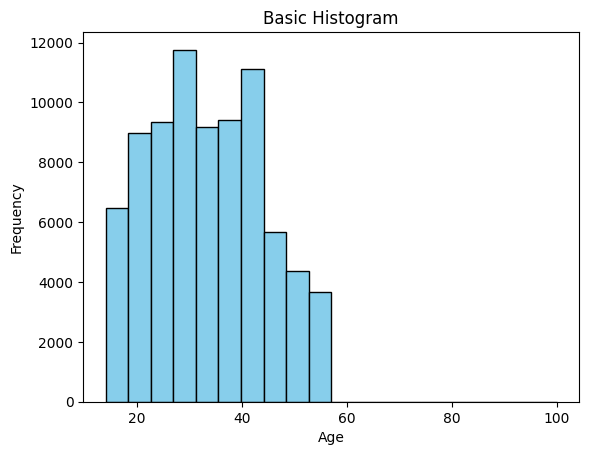

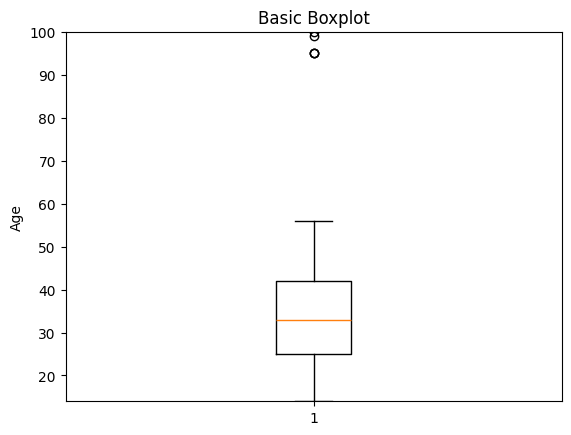

In [25]:
# Check variable using plots:
plot_numerical_column(df, 'Age', 20)

#### Occupation

In [26]:
# Extracting unique data
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [27]:

# There is a placeholder present. We will replace it with null for now and deal with it later.
df['Occupation'][df['Occupation'] == '_______'] = np.nan

# get details on column
df['Occupation'].describe()

count      74363
unique        15
top       Lawyer
freq        5334
Name: Occupation, dtype: object

In [28]:
# counting null values
df['Occupation'].isnull().sum()

np.int64(5637)

In [29]:
# So, no one has transitioned into new role or maybe its not mentioned and is coming as null. But these possibilities we obviously can't tell 
# until and unless we get back to the customer. We need to make the most appropriate educated guess for now.
df['Occupation'] =  df.groupby('Customer_ID')['Occupation'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Occupation'].describe()

count      80000
unique        15
top       Lawyer
freq        5768
Name: Occupation, dtype: object

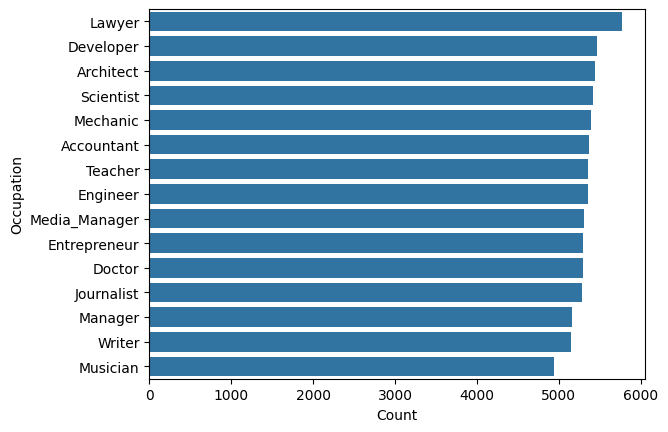

In [30]:
# Casting to correct data type
df['Occupation'] = df['Occupation'].astype("string")

# Check variable using plots:
plot_no_numerical_column(df, 'Occupation')

### Annual_Income

In [31]:
# using regex to find values which don't follow the pattern of a float
df['Annual_Income'][~df['Annual_Income'].str.fullmatch('([0-9]*[.])?[0-9]+')].unique() 

array(['34847.84_', '30689.89_', '35547.71_', ..., '32639.9_', '7369.03_',
       '16159.51_'], dtype=object)

In [32]:
# Replacing underscores with empty files
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

# get details on column
df['Annual_Income'].describe()

count        80000
unique       10781
top       17273.83
freq            16
Name: Annual_Income, dtype: object

In [33]:
# Casting to the correct data type
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [34]:
# From the data cleaning we know that the Annual Income  max value is 180,000, so we will set all values bigger than 180000 to NA
df.loc[df['Annual_Income'] > 180000, 'Annual_Income'] = pd.NA

# get details on column
df['Annual_Income'].describe()

count     79207.000000
mean      50471.128311
std       38381.756882
min        7005.930000
25%       19280.730000
50%       36818.290000
75%       71633.480000
max      179987.280000
Name: Annual_Income, dtype: float64

In [35]:
# Since the maximum is to big and probably 
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Annual_Income'].describe()

count     80000.000000
mean      50476.590536
std       38386.846333
min        7005.930000
25%       19280.227500
50%       36819.645000
75%       71664.225000
max      179987.280000
Name: Annual_Income, dtype: float64

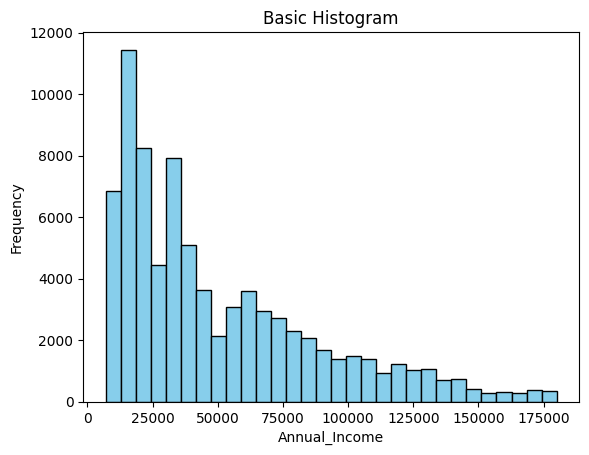

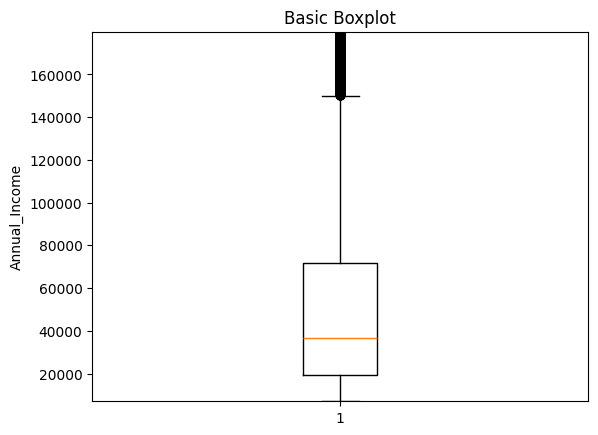

In [36]:
# Check variable using plots:
plot_numerical_column(df, 'Annual_Income', 30)

### Monthly Inhand Salary

In [37]:
# get details on column
df['Monthly_Inhand_Salary'].describe()

count    68024.000000
mean      4187.986857
std       3189.454847
min        319.556250
25%       1623.555417
50%       3068.576667
75%       5954.646667
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [38]:
# Since the maximum is to big and probably 
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Monthly_Inhand_Salary'].describe()

count    80000.000000
mean      4196.340204
std       3193.985175
min        319.556250
25%       1626.525000
50%       3074.046250
75%       5957.715000
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

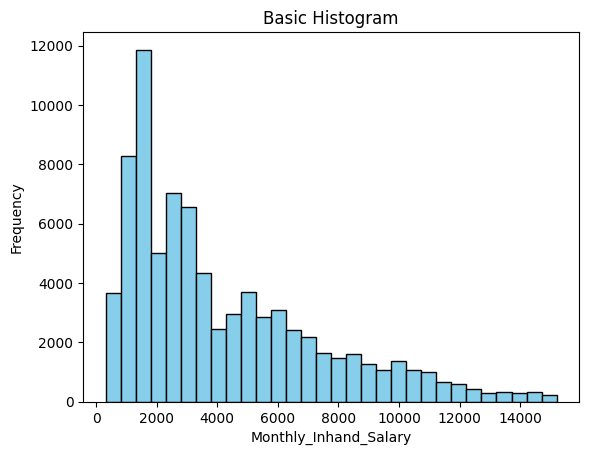

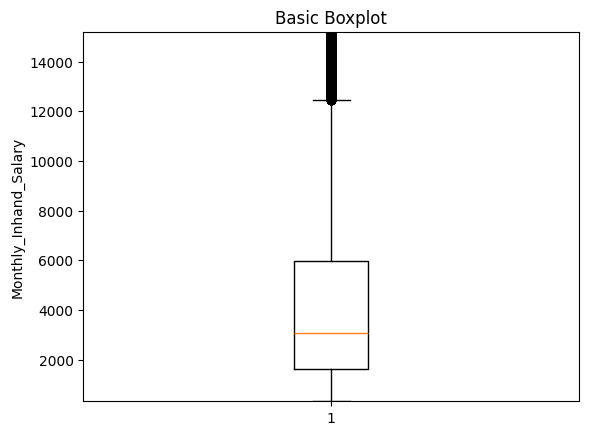

In [39]:
# Check variable using plots:
plot_numerical_column(df, 'Monthly_Inhand_Salary', 30)

### Number of Credit Cards

In [40]:
# get details on column
df['Num_Credit_Card'].describe()

count    80000.000000
mean        22.765950
std        130.612063
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

In [41]:
# From the data cleaning we know that the Annual Income  max value is 180,000, so we will set all values bigger than 10 to NA
df.loc[df['Num_Credit_Card'] > 11, 'Num_Credit_Card'] = pd.NA

# get details on column
df['Num_Credit_Card'].describe()

count    78181.000000
mean         5.541372
std          2.063055
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

In [42]:
# Since the maximum is to big and probably 
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Num_Credit_Card'].describe()

count    80000.000000
mean         5.541462
std          2.062664
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

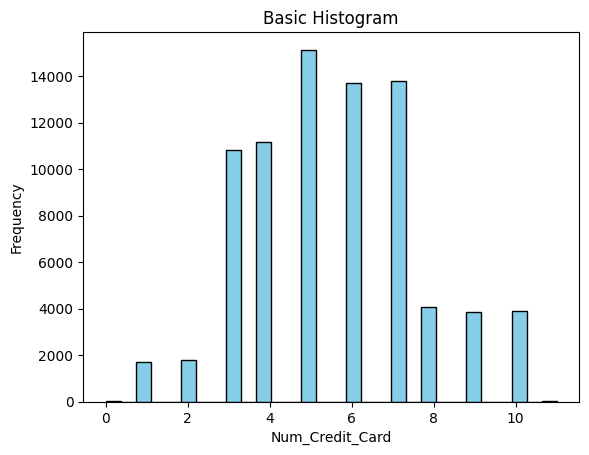

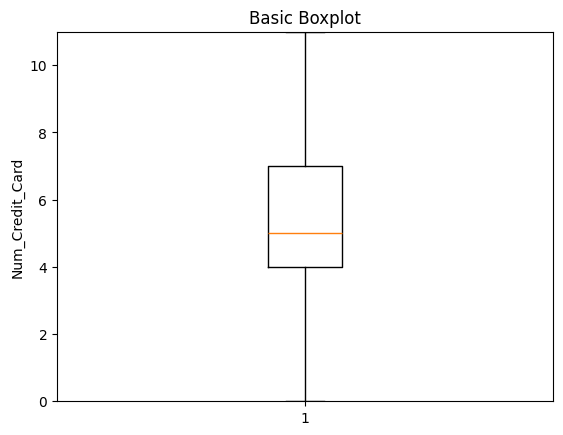

In [43]:
# Check variable using plots:
plot_numerical_column(df, 'Num_Credit_Card', 30)

### Interest Rate

In [44]:
# get details on column
df['Interest_Rate'].describe()

count    80000.000000
mean        71.971700
std        463.809393
min          1.000000
25%          8.000000
50%         14.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

In [45]:
# From the data cleaning we know that the Annual Income  max value is 180,000, so we will set all values bigger than 10 to NA
df.loc[df['Interest_Rate'] > 34, 'Interest_Rate'] = pd.NA

# get details on column
df['Interest_Rate'].describe()

count    78376.000000
mean        14.555527
std          8.733964
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [46]:
# filling NA with median
df['Interest_Rate'] = df.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.median())

# get details on column
df['Interest_Rate'].describe()

count    80000.000000
mean        14.560100
std          8.737674
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

### Credit Mix

In [47]:
# get details on column
df['Credit_Mix'].describe()

count        80000
unique           4
top       Standard
freq         29141
Name: Credit_Mix, dtype: object

In [48]:
# The column contains underscores as placeholders. We will replace them with null for now.
df['Credit_Mix'][df['Credit_Mix'] == '_'] = np.nan

In [49]:
# From the data clean file, we will fill forward and backward any missing data
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Credit_Mix'].describe()

count        80000
unique           3
top       Standard
freq         36632
Name: Credit_Mix, dtype: object

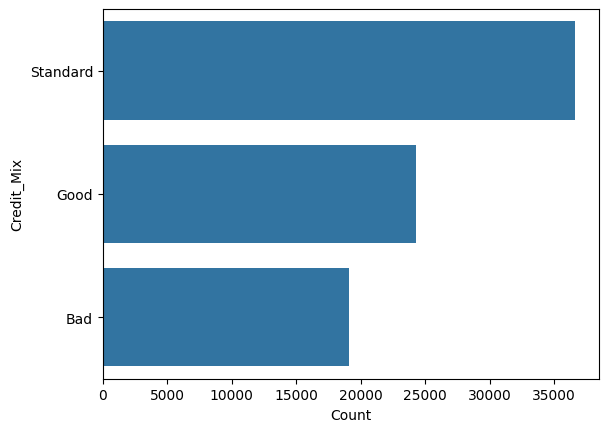

In [50]:
# Casting to correct data type
df['Credit_Mix'] = df['Credit_Mix'].astype("string")

# Check variable using plots:
plot_no_numerical_column(df, 'Credit_Mix')

### Credit Utilization Ratio

In [51]:
# get details on column
df['Credit_Utilization_Ratio'].describe()

count    80000.000000
mean        32.303583
std          5.120211
min         20.000000
25%         28.063496
50%         32.343787
75%         36.515261
max         50.000000
Name: Credit_Utilization_Ratio, dtype: float64

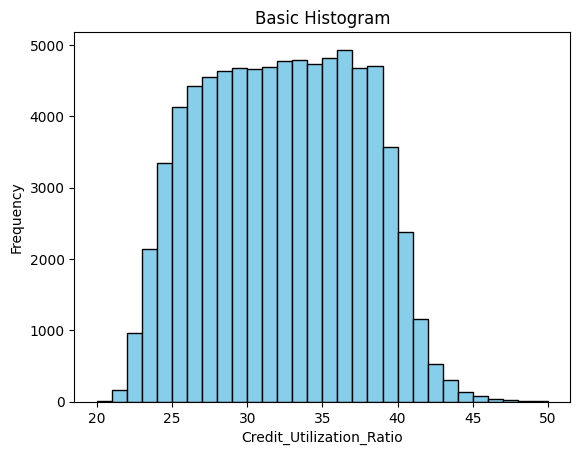

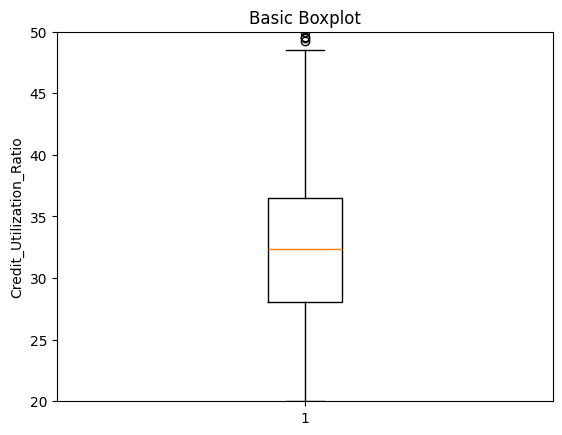

In [52]:
# Check variable using plots:
plot_numerical_column(df, 'Credit_Utilization_Ratio', 30)

### Credit Score

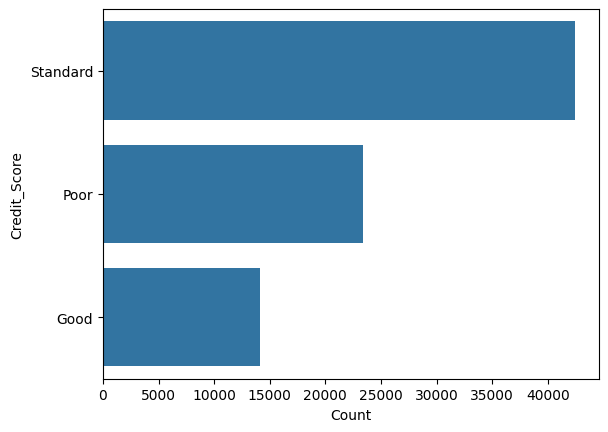

In [53]:
# Casting to correct data type
df['Credit_Score'] = df['Credit_Score'].astype("string")

# Check variable using plots:
plot_no_numerical_column(df, 'Credit_Score')

### Check for duplicates

In [54]:
# This is only checking for exact duplicates. Are there duplicates that we are missing?
#HINT What happens if a fire exists across multiple counties.
df.duplicated().sum()

np.int64(0)

### Look at summary data

In [55]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Credit_Utilization_Ratio
count,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,33.36955,50476.590536,4196.340204,5.541462,14.560100,32.303583
std,10.76125,38386.846333,3193.985175,2.062664,8.737674,5.120211
min,14.00000,7005.930000,319.556250,0.000000,1.000000,20.000000
25%,25.00000,19280.227500,1626.525000,4.000000,7.000000,28.063496
50%,33.00000,36819.645000,3074.046250,5.000000,13.000000,32.343787
75%,42.00000,71664.225000,5957.715000,7.000000,20.000000,36.515261
max,100.00000,179987.280000,15204.633333,11.000000,34.000000,50.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Age                       80000 non-null  int64  
 3   Occupation                80000 non-null  string 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     80000 non-null  float64
 6   Num_Credit_Card           80000 non-null  float64
 7   Interest_Rate             80000 non-null  float64
 8   Credit_Mix                80000 non-null  string 
 9   Credit_Utilization_Ratio  80000 non-null  float64
 10  Credit_Score              80000 non-null  string 
dtypes: float64(5), int64(1), object(2), string(3)
memory usage: 6.7+ MB


In [57]:
# We have selected some features below, you can add more.
#HINT: look at the dtypes above
l_target = ['Credit_Score']
l_cols_numerical = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card', 'Interest_Rate', 'Credit_Utilization_Ratio'] 
l_cols_categorical = ['Occupation', 'Credit_Mix']

### Visualize variables

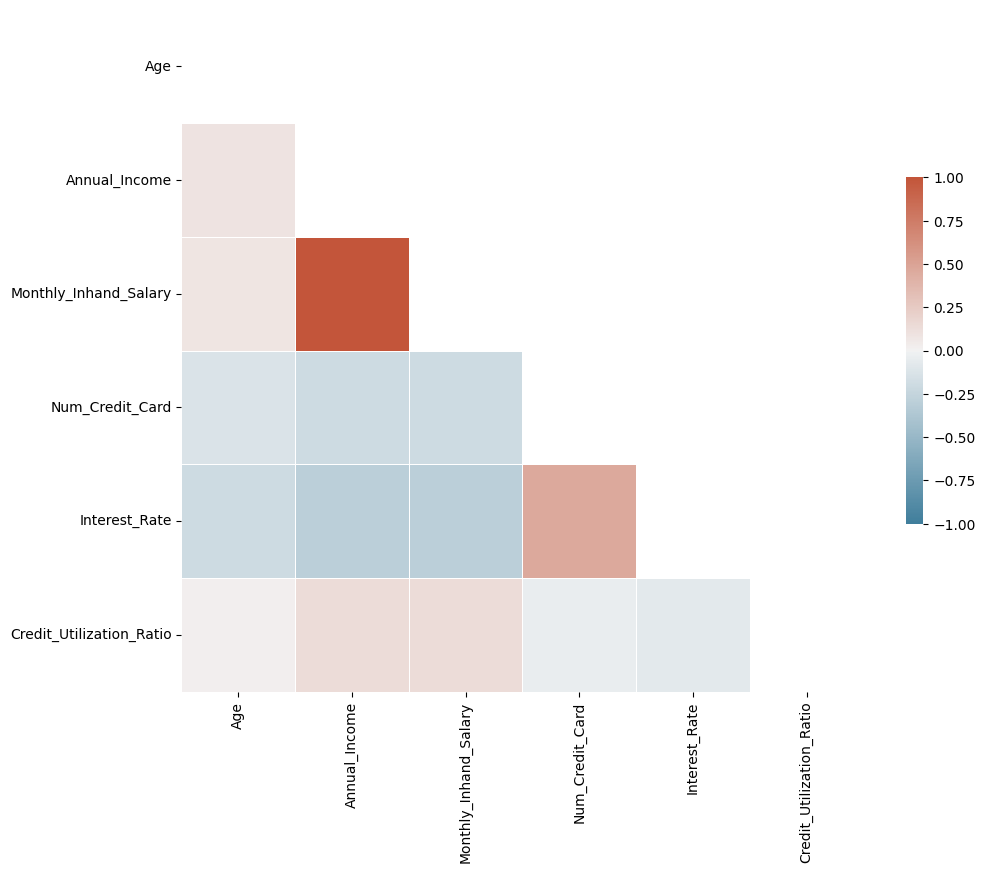

In [58]:
# Check cross-correlation of numerical columns (use a spearman method because it is highly likely relationships are non-linear)
df_corr = df[l_cols_numerical].corr(method='spearman')
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr,
            mask=np.triu(np.ones_like(df_corr, dtype=bool)), 
            cmap=sns.diverging_palette(230, 20, as_cmap=True), 
            vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

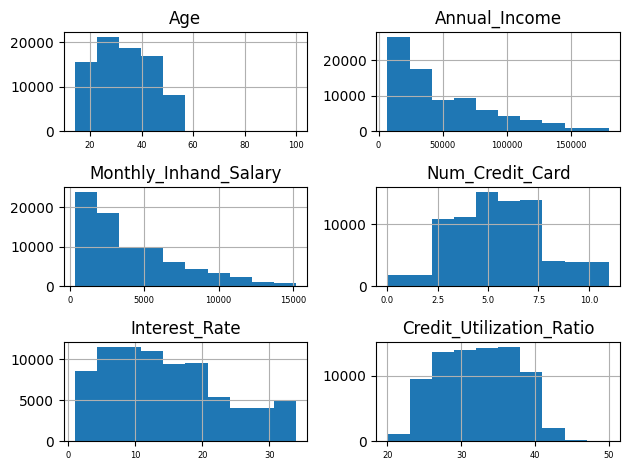

In [59]:
# Look at Histograms
df[l_cols_numerical].hist(xlabelsize =6)
plt.tight_layout()

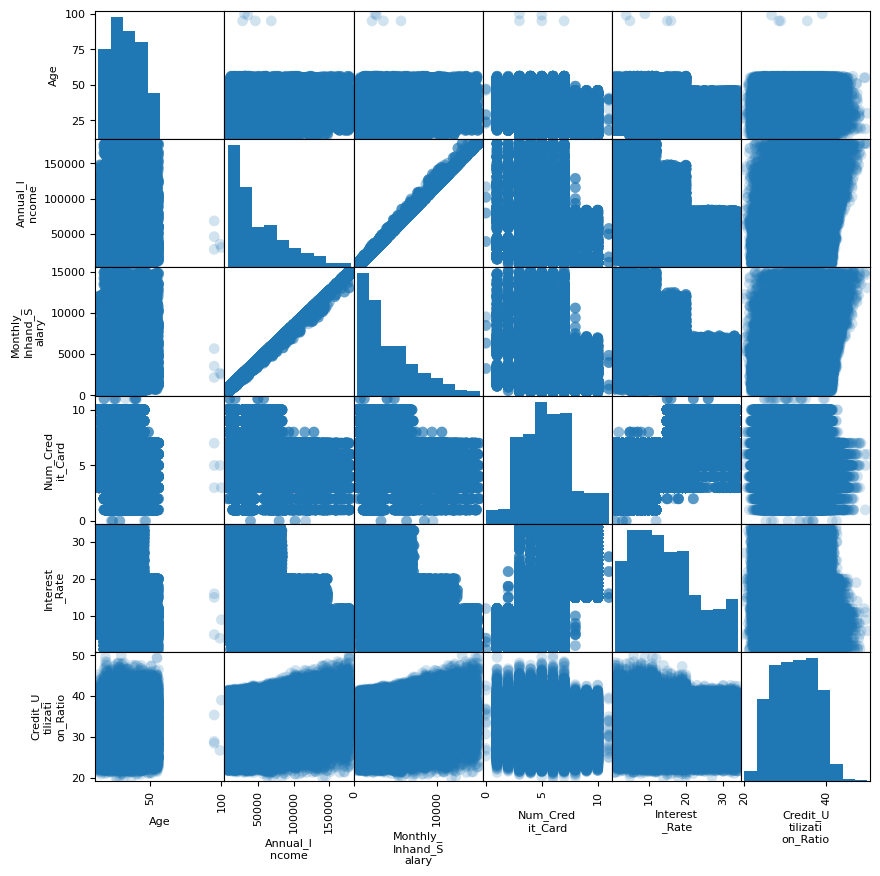

In [60]:
# Look at scattered plots
axs = pd.plotting.scatter_matrix(df[l_cols_numerical], figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.2)

def wrap(txt, width=8):
    '''helper function to wrap text for long labels'''
    import textwrap
    return '\n'.join(textwrap.wrap(txt, width))

for ax in axs[:,0]: # the left boundary
    ax.set_ylabel(wrap(ax.get_ylabel()), size = 8)
    ax.set_xlim([None, None])
    ax.set_ylim([None, None])

for ax in axs[-1,:]: # the lower boundary
    ax.set_xlabel(wrap(ax.get_xlabel()), size = 8)
    ax.set_xlim([None, None])
    ax.set_ylim([None, None])

<Axes: >

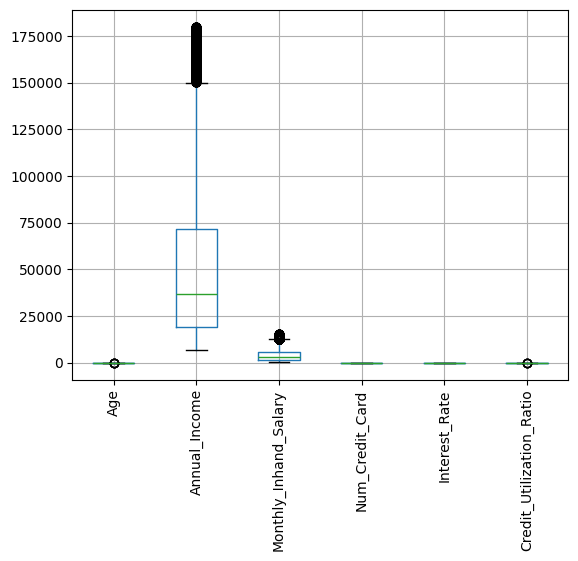

In [61]:
# Box plots for all variables 
df[l_cols_numerical].boxplot(rot=90)

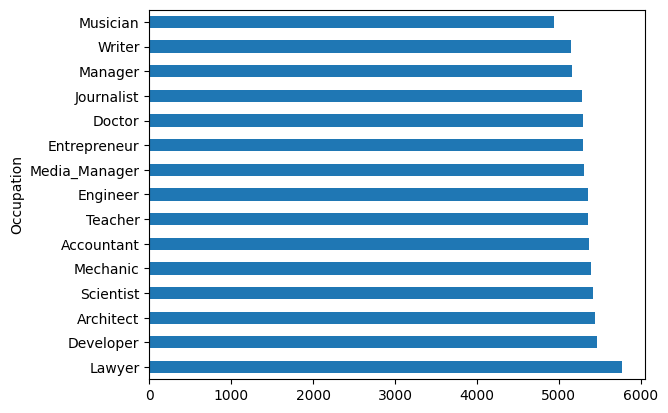

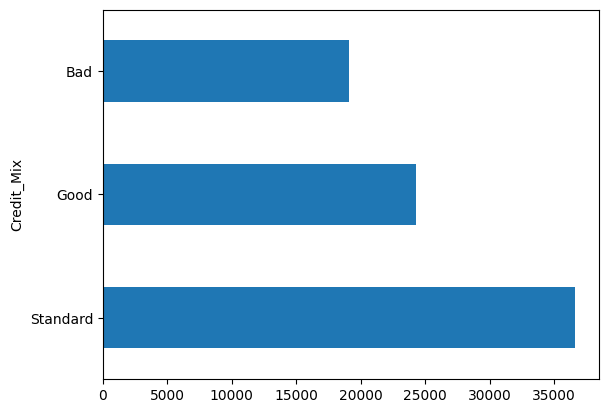

In [62]:
# Plotting categorical variables
for x in [*l_cols_categorical]:
    df[x].value_counts().plot(kind='barh')
    plt.show()

In [63]:
# Feel free to generate any other visualizations that you're interested in to continue digging into the data.

### Feature Derivation/Engineering

In [64]:
# Perform any feature engineering and check with visualizations, recommend using a temporary dataframe for trial, 
# and then putting the actual code into the feature_engineering function below to be able to replicate the same 
# transformations to test data later on

## Feature Selection

In [65]:
# Drop costumer ID and cast ID
df = df.drop(columns='Customer_ID')

df['ID'] = df['ID'].astype('string')

# Getting information on the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  string 
 1   Age                       80000 non-null  int64  
 2   Occupation                80000 non-null  string 
 3   Annual_Income             80000 non-null  float64
 4   Monthly_Inhand_Salary     80000 non-null  float64
 5   Num_Credit_Card           80000 non-null  float64
 6   Interest_Rate             80000 non-null  float64
 7   Credit_Mix                80000 non-null  string 
 8   Credit_Utilization_Ratio  80000 non-null  float64
 9   Credit_Score              80000 non-null  string 
dtypes: float64(5), int64(1), string(4)
memory usage: 6.1 MB


In [66]:
# If you want to change the variables for your model, do that here!
target = ['Credit_Score']
continuous_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card', 'Interest_Rate', 'Credit_Utilization_Ratio'] 
categorical_features = ['Occupation', 'Credit_Mix']

In [67]:
# Encode variables to use in Neural Network
# A one hot encoding is appropriate for categorical data where no relationship exists between categories.
# It involves representing each categorical variable with a binary vector that has one element for each 
# unique label and marking the class label with a 1 and all other elements 0.

# For example, if our variable was “color” and the labels were “red,” “green,” and “blue,” we would encode 
# each of these labels as a three-element binary vector as follows:

# Red: [1, 0, 0]
# Green: [0, 1, 0]
# Blue: [0, 0, 1]

# Then each label in the dataset would be replaced with a vector (one column becomes three). 
# This is done for all categorical variables so that our nine input variables or columns become 
# 43 in the case of the breast cancer dataset.

# The scikit-learn library provides the OneHotEncoder to automatically one hot encode one or more variables.

# Encoder for input features
encoder = OneHotEncoder(handle_unknown='ignore')

# Encoder for target
le = LabelEncoder()

In [68]:
# Encoding categorical features
encoded_features = encoder.fit_transform(df[categorical_features])

# Convert the encoded data back to a DataFrame:
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))

# joining dataframes 
df = pd.concat([df, encoded_df], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  string 
 1   Age                       80000 non-null  int64  
 2   Occupation                80000 non-null  string 
 3   Annual_Income             80000 non-null  float64
 4   Monthly_Inhand_Salary     80000 non-null  float64
 5   Num_Credit_Card           80000 non-null  float64
 6   Interest_Rate             80000 non-null  float64
 7   Credit_Mix                80000 non-null  string 
 8   Credit_Utilization_Ratio  80000 non-null  float64
 9   Credit_Score              80000 non-null  string 
 10  Occupation_Accountant     80000 non-null  float64
 11  Occupation_Architect      80000 non-null  float64
 12  Occupation_Developer      80000 non-null  float64
 13  Occupation_Doctor         80000 non-null  float64
 14  Occupa

In [69]:
# Encoding categorical features
encoded_target = encoder.fit_transform(df[target])

# Convert the encoded data back to a DataFrame:
encoded_target_df = pd.DataFrame(encoded_target.toarray(), columns=encoder.get_feature_names_out(target))

# joining dataframes 
df = pd.concat([df, encoded_target_df], axis=1)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  string 
 1   Age                       80000 non-null  int64  
 2   Occupation                80000 non-null  string 
 3   Annual_Income             80000 non-null  float64
 4   Monthly_Inhand_Salary     80000 non-null  float64
 5   Num_Credit_Card           80000 non-null  float64
 6   Interest_Rate             80000 non-null  float64
 7   Credit_Mix                80000 non-null  string 
 8   Credit_Utilization_Ratio  80000 non-null  float64
 9   Credit_Score              80000 non-null  string 
 10  Occupation_Accountant     80000 non-null  float64
 11  Occupation_Architect      80000 non-null  float64
 12  Occupation_Developer      80000 non-null  float64
 13  Occupation_Doctor         80000 non-null  float64
 14  Occupa

## Modeling

In [70]:
# Constructing dataframe for modeling
features_for_model = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card'
                      , 'Interest_Rate', 'Credit_Utilization_Ratio', 'Credit_Mix_Bad'
                      , 'Credit_Mix_Good', 'Credit_Mix_Standard', 'Occupation_Accountant', 'Occupation_Architect'
                      , 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur'
                      , 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic'
                      ,'Occupation_Media_Manager' , 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher'
                      , 'Occupation_Writer'
                      ] 

target_features = ['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard']

# Getting the size of input size
print(len(features_for_model))

24


In [71]:
# Defining data sets
X = encoded_features.toarray()
y = encoded_target.toarray()
# y = to_categorical(df[target_features])
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


### Train / test split

In [72]:
# Basic train-test split
# 80% training and 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)

# Checking the dimensions of the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(64000, 18)
(64000, 3)
(16000, 18)
(16000, 3)


In [73]:
# Printing X_train and y_train
print(X_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


### Neural Network

In [74]:
# Set up the layers
###################
# The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.
# Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

# Create network topology
model = keras.Sequential()

# Adding input model --> 24 input layers
model.add(Dense(24, input_dim = X_train.shape[1], activation = 'relu'))

# Adding hidden layer 
model.add(keras.layers.Dense(48, activation="relu"))
model.add(keras.layers.Dense(96, activation="relu"))
model.add(keras.layers.Dense(96, activation="relu"))
model.add(keras.layers.Dense(48, activation="relu"))

# output layer
# For classification tasks, we generally tend to add an activation function in the output ("sigmoid" for binary, and "softmax" for multi-class, etc.).
model.add(keras.layers.Dense(3, activation="softmax"))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 96)             │         9,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,475 (79.98 KB)

 Trainable params: 20,475 (79.98 KB)

 Non-trainable params: 0 (0.00 B)

None


In [75]:
# Compile the Model
###################
# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [76]:
# Train the Model
#################
# Training the neural network model requires the following steps:
# Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
# The model learns to associate images and labels.
# You ask the model to make predictions about a test set—in this example, the test_images array.
# Verify that the predictions match the labels from the test_labels array.
# Feed the model
# To start training, call the model.fit method—so called because it "fits" the model to the training data:

model.fit(X_train, y_train, epochs = 12, batch_size = 20)

Epoch 1/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step - accuracy: 0.6031 - loss: 0.8428
Epoch 2/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step - accuracy: 0.6219 - loss: 0.8199
Epoch 3/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.6218 - loss: 0.8204
Epoch 4/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.6196 - loss: 0.8217
Epoch 5/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.6225 - loss: 0.8197
Epoch 6/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.6173 - loss: 0.8248
Epoch 7/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.6221 - loss: 0.8180
Epoch 8/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.6192 - loss: 0.8187
Epoch 9/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.6213 - loss: 0.8197
Epoch 10/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.6240 - loss: 0.8129
Epoch 11/12
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.6242 - loss: 0.8153
Epoch 12

In [77]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nLoss:', test_loss)

500/500 - 0s - 426us/step - accuracy: 0.6233 - loss: 0.8171

Test accuracy: 0.6232500076293945

Loss: 0.8170660138130188


## Make Predictions

In [78]:
# Make Predictions
predictions = model.predict(X_test)

# Here, the model has predicted the label for each image in the testing set. Let's take a look at some predictions
print(predictions[0])
print(predictions[10])
print(predictions[100])
print(predictions[1000])
print(predictions[10000])

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step
[0.05452206 0.22618613 0.71929175]
[0.48911628 0.17148279 0.33940092]
[0.0565386  0.20918654 0.73427486]
[0.06101418 0.21816722 0.7208186 ]
[0.48307925 0.15759443 0.3593264 ]


In [79]:
# 3 different credit scores. You can see the comparison between the trained and tested values

# getting y_test values
y_tested = encoder.inverse_transform(y_test)


# getting the value of the predictions
y_predicted = encoder.inverse_transform(predictions)

# printing the first 15 values of the test and predicted values 
data = []
for i in range(15):
    data.append([y_tested[i], y_predicted[i]])

headers = ["True Value", "Predicted Value"]

print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------+-------------------+
| True Value   | Predicted Value   |
+==============+===================+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Standard'] | ['Poor']          |
+--------------+-------------------+
| ['Poor']     | ['Standard']      |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Good']     | ['Good']          |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Good']     | ['Poor']          |
+--------------+-------------------+
| ['Standard'] | ['Poor']          |
+--------------+-------------------+
| ['Good']     | ['Good']          |
+--------------+-------------------+
| ['Standard'] | ['Poor']          |
+--------------+-------------------+
|

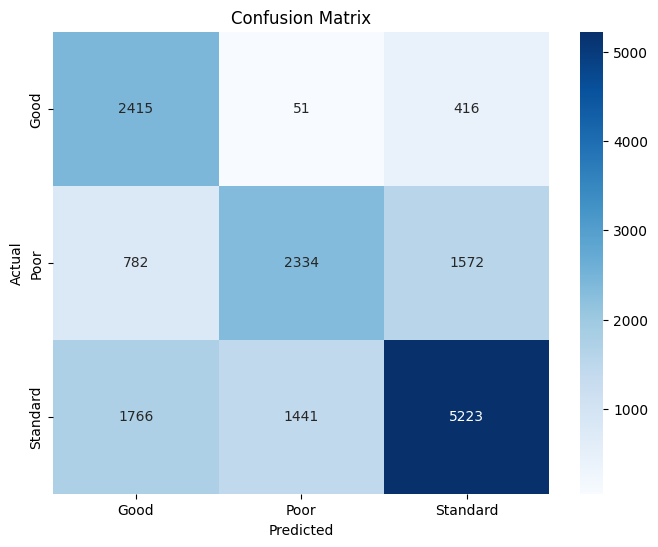

In [80]:
# Confusion Matrix
##################

# A confusion matrix for 3 variables is a table that visually represents how well a classification model performs when 
# predicting three different categories, where each row represents the actual class and each column represents the predicted class,
# resulting in a 3x3 grid that shows how many instances were correctly classified and how many were misclassified between each 
# of the three possible categories; essentially, it provides a detailed breakdown of the model's errors for each class in 
# a multi-class classification problem.

# Key points about a 3-variable confusion matrix:
################################################
# Structure:
# The matrix has 3 rows and 3 columns, where each row represents one of the actual classes and each column represents one of the predicted classes. 
 
# Diagonal elements:
# The diagonal cells of the matrix represent the correctly classified instances for each class. 
 
# Off-diagonal elements:
# The values in off-diagonal cells represent the misclassified instances, showing which class the model tends to confuse with another. 

# Class labels
class_labels=['Good', 'Poor', 'Standard']

plot_prediction_vs_test_categorical(y_tested, y_predicted, class_labels)

In [81]:
# Explanation of Metrics
########################

# Accuracy: The proportion of correctly classified samples.
# Precision: The ability of the classifier not to label a negative sample as positive.
# Recall: The ability of the classifier to find all the positive samples.
# F1-score: A weighted average of precision and recall.
# Confusion Matrix: A table showing the number of true positives, true negatives, false positives, and false negatives for each class. 
 
# Important Considerations:
# Averaging:
# The average parameter in precision_score, recall_score, and f1_score can be set to different values:
# 'macro': Calculates the metric for each label, and finds their unweighted mean.
# 'micro': Calculates the metric globally by counting the total true positives, false negatives, and false positives.
# 'weighted': Calculates the metric for each label, and finds their average weighted by support (the number of true instances for each label).
# Class Imbalances:
# If your dataset has class imbalances, consider using metrics like f1_score and recall that are less sensitive to this issue.

# Calculating perofrmace of model
calculate_performance_multiclass(y_tested, y_predicted)

{'accuracy': 0.62325,
 'precision': np.float64(0.6069825066075017),
 'recall': np.float64(0.6517998660360326),
 'f1_score': np.float64(0.610604106510359),
 'confusion_matrix': array([[2415,   51,  416],
        [ 782, 2334, 1572],
        [1766, 1441, 5223]])}